Project Roadmap:

1) Data Exploration and Understanding:

* Load the training dataset (train.csv) and examine its structure.
* Analyze the features and their data types.
* Identify missing values and decide on an appropriate strategy for handling them.
* Study the distribution of the target variable (Transported) to understand the class imbalance, if any.
* Explore the relationships between features and the target variable.

2) Data Cleaning and Preprocessing:

* Handle missing values by imputation or deletion, depending on the feature and the amount of missing data.
* Convert categorical variables into numerical representations (e.g., one-hot encoding or label encoding).
* Perform feature scaling/normalization if required.
* Extract useful information from the existing features (e.g., extract titles from names or create age groups).
* Consider dropping irrelevant or redundant features.

3)Feature Engineering:

* Create new features based on domain knowledge or insights gained during data exploration.
* Generate interaction or polynomial features to capture non-linear relationships.
* Handle categorical variables with high cardinality (e.g., by using feature hashing or target encoding).
* Perform dimensionality reduction techniques if necessary (e.g., PCA, LDA).

4)Model Training:

* Split the training data into train and validation sets for model evaluation.
* Select appropriate evaluation metrics based on the problem and the data characteristics (e.g., accuracy, precision, recall, F1-score).
* Choose suitable machine learning algorithms for binary classification (e.g., logistic regression, decision trees, random forest, gradient boosting, neural networks).
* Train multiple models using different algorithms and compare their performances.
* Optimize hyperparameters of the chosen models using techniques like grid search, random search, or Bayesian optimization.

5) Model Evaluation and Improvement:

* Evaluate the trained models on the validation set using the selected metrics.
* Analyze the model's performance and identify areas for improvement (e.g., high bias or high variance).
* Iterate on feature engineering, data cleaning, and preprocessing steps to improve model performance.
* Consider ensemble techniques (e.g., stacking, bagging, boosting) to further enhance model performance.
* Utilize techniques like cross-validation or bootstrap aggregation to estimate the model's generalization error.

6) Final Model Selection and Testing:

* Select the best-performing model based on the evaluation metrics and generalization performance.
* Retrain the selected model on the entire training dataset.
* Apply the chosen preprocessing steps and feature transformations on the test dataset (test.csv).
* Use the trained model to predict the target variable (Transported) for the test dataset.
* Prepare the submission file (sample_submission.csv) with the predicted values.

7) Documentation and Reporting:

* Document the entire project, including the steps performed, methodologies, algorithms, and techniques used.
* Prepare visualizations (using libraries such as Matplotlib and Seaborn) to present insights and findings.
* Summarize the project, highlighting the key challenges faced, solutions implemented, and the final model's performance.
* Create a well-structured and detailed report or notebook to showcase the project in your portfolio.

### 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.shape

(8693, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
# Identify missing values and decide on a strategy for handling them
missing_values = df.isnull().sum()
print(missing_values)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [6]:
df.Name

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [7]:
# Explore the relationships between features and the target variable
feature_correlations = df.corr()['Transported'].abs().sort_values(ascending=False)
print(feature_correlations)

Transported     1.000000
RoomService     0.244611
Spa             0.221131
VRDeck          0.207075
Age             0.075026
FoodCourt       0.046566
ShoppingMall    0.010141
Name: Transported, dtype: float64


C:\Users\scank\AppData\Local\Temp\ipykernel_7204\2655698084.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_correlations = df.corr()['Transported'].abs().sort_values(ascending=False)


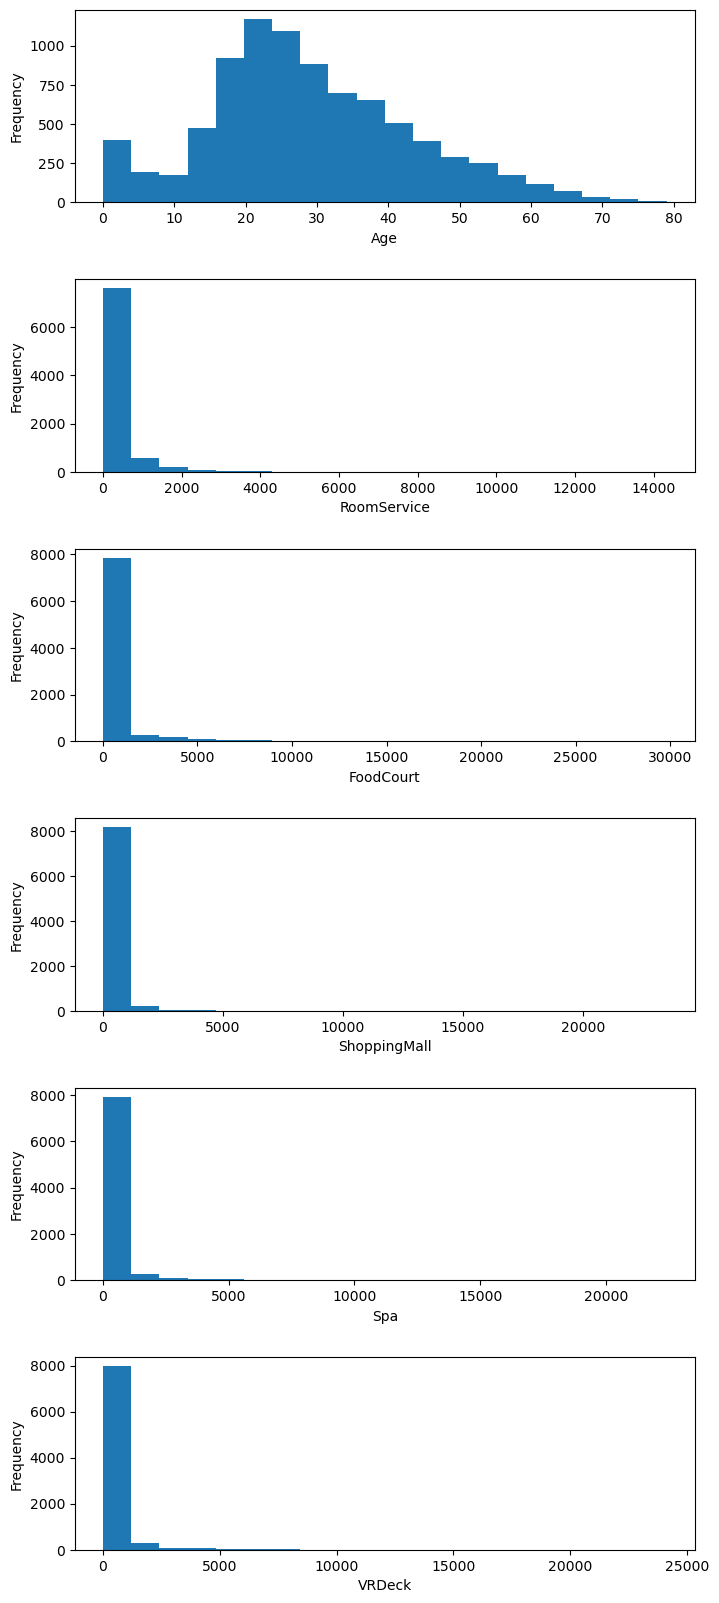

In [8]:
# Select numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for subplots
nrows = len(numeric_features)
ncols = 1

# Visualize the distributions of numeric features
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 20))
fig.subplots_adjust(hspace=0.4)

for i, column in enumerate(numeric_features):
    ax = axes[i]
    ax.hist(df[column], bins=20)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.show()


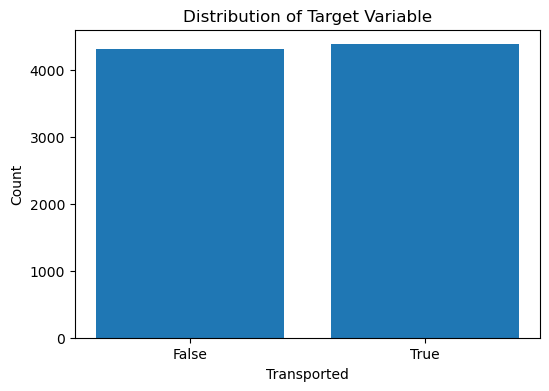

In [9]:
# Count the occurrences of each clas
class_counts = df['Transported'].value_counts()

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Transported')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'])
plt.title('Distribution of Target Variable')
plt.show()

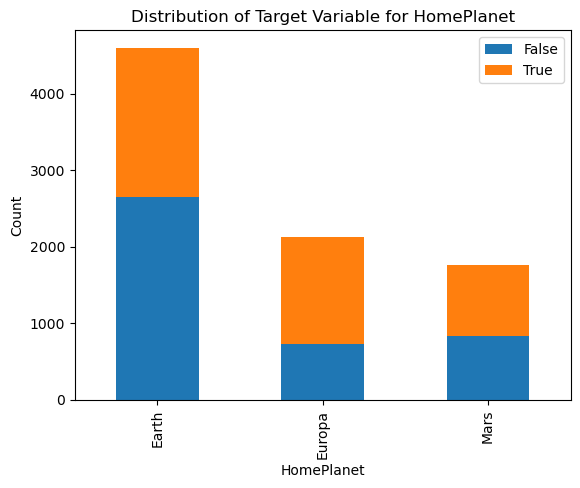

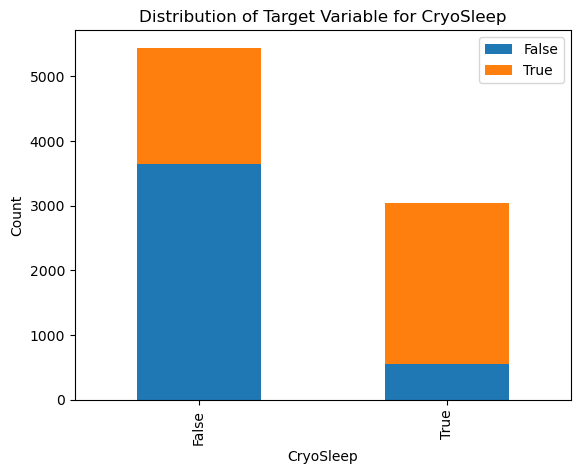

In [10]:
# Define the categorical features of interest
categorical_features = ['HomePlanet', 'CryoSleep']

# Create bar plots for each categorical feature
for feature in categorical_features:
    # Count the occurrences of each class within the feature
    class_counts = df.groupby(feature)['Transported'].value_counts().unstack()

    # Plot the distribution of the target variable for different categories/levels
    class_counts.plot(kind='bar', stacked=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Distribution of Target Variable for {}'.format(feature))
    plt.legend(['False', 'True'])
    plt.show()

In [11]:
# Find categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Print number of unique values in each category
for feature in categorical_features:
    unique_count = df[feature].nunique()
    print("Number of unique values in '{}': {}".format(feature, unique_count))


Number of unique values in 'PassengerId': 8693
Number of unique values in 'HomePlanet': 3
Number of unique values in 'CryoSleep': 2
Number of unique values in 'Cabin': 6560
Number of unique values in 'Destination': 3
Number of unique values in 'VIP': 2
Number of unique values in 'Name': 8473


### 2. Data Preprocessing & Feature Engineering

Based on the given variables, here are some suggestions for feature engineering:

**Group Size**: Extract the group size from the PassengerId variable. This can be done by splitting the PassengerId string and counting the number of passengers in each group. This feature could potentially capture the dynamics of traveling with family or friends.

**Departure Planet Type**: Analyze the HomePlanet variable and create a new categorical feature that represents the type of departure planet. This can be based on different criteria, such as planet classification (e.g., terrestrial, gas giant) or specific categories (e.g., Earth-like, exoplanet).

**Cabin Deck**: Extract the deck information from the Cabin variable. This can provide insights into the location of the passenger's cabin on the spaceship. Creating a separate feature for the deck could capture potential patterns related to cabin proximity to certain amenities or evacuation routes.

**Cabin Side**: Extract the side (Port or Starboard) from the Cabin variable. This can provide information about the passenger's location in terms of ship orientation. It might be interesting to investigate if there are any correlations between the cabin side and the likelihood of being transported.

**Age Group**: Group the passengers into different age groups to capture potential age-related patterns. This can be done by creating bins based on age ranges (e.g., children, young adults, middle-aged, elderly).

**Total Luxury Spending**: Sum up the amounts billed at the luxury amenities (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) to create a new feature representing the total luxury spending by each passenger.



In [12]:
df = pd.read_csv("data/train.csv")

In [13]:
# Create preprocessing function so that we can use it on the test set

def preprocessing(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns

    # Fill missing values with median
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # Find categorical variables
    categorical_columns = df.select_dtypes(include='object').columns

    # Exclude 'CryoSleep' column
    categorical_columns = categorical_columns.drop('CryoSleep')

    # Fill missing values in categorical variables
    df[categorical_columns] = df[categorical_columns].fillna('missing')
    
    # Convert Boolean values to strings
    df['CryoSleep'] = df['CryoSleep'].astype(str)
    df['VIP'] = df['VIP'].astype(str)
    df['Transported'] = df['Transported'].astype(str)
    
    # Drop Name
    df.drop('Name', axis=1, inplace=True)


    
def feature_engineering(df):
    # ---------------------------------------------------------
    # Feature 1) Group Size 
    # ---------------------------------------------------------
    
    # Split the PassengerId column to extract group and individual numbers
    split_ids = df['PassengerId'].str.split('_', expand=True)

    # Extract the group number
    df['Group'] = split_ids[0]

    # Extract the individual number and convert to integer
    df['Individual'] = split_ids[1].astype(int)

    # Calculate the maximum group size
    group_sizes = df.groupby('Group')['Individual'].max()

    # Map the maximum group size to each passenger
    df['GroupSize'] = df['Group'].map(group_sizes)
    
    # Drop additional features we've created to make GroupSize
    df.drop(['Group', 'Individual', 'PassengerId'], axis=1, inplace=True)
    
    # ---------------------------------------------------------
    # Feature 2) Cabin Side 
    # ---------------------------------------------------------
    
    # Extract Cabin Side from Cabin variable
    df['CabinSide'] = df['Cabin'].str.split('/').str[-1]
    
    # ---------------------------------------------------------
    # Feature 3) Cabin Deck 
    # ---------------------------------------------------------
    
    # Extract Cabin Deck from Cabin variable
    df['CabinDeck'] = df['Cabin'].str.split('/').str[0]
    
    # Drop Cabin since it has high number of unique values
    df.drop(['Cabin'], axis=1, inplace=True)
    
    # ---------------------------------------------------------
    # Feature 4) Age Categories
    # ---------------------------------------------------------
    
    # Define the age ranges for the different categories
    age_bins = [0, 10, 18, 30, 50, float('inf')]  # Customize the age ranges as per your preference

    # Define the labels for the age categories
    age_labels = ['Children', 'Teenagers', 'Young Adults', 'Middle-aged', 'Elderly']

    # Create the "AgeGroup" feature by binning the ages
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
    
    
    # ---------------------------------------------------------
    # Feature 5) Total Luxury Spending
    # ---------------------------------------------------------
    
    # Sum up the luxury spending for each passenger
    df['TotalLuxurySpending'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)


In [14]:
preprocessing(df)
feature_engineering(df)

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a function for MinMaxScaler
def min_max_scaling(df):
    scaler = MinMaxScaler()
    numeric_columns = df.select_dtypes(include='number').columns
    df_scaled = df.copy()  # Create a copy of the original dataframe
    df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])
    return df_scaled

# Apply MinMaxScaler to numeric columns
df_min_max_scaled = min_max_scaling(df)

In [16]:
df_min_max_scaled.shape

(8693, 16)

In [17]:
def encode_categorical(df):
    # Get the list of categorical columns excluding 'Transported'
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.drop('Transported')
    
    # Perform one-hot encoding for categorical columns except 'Transported'
    df_encoded = pd.get_dummies(df, columns=categorical_columns)
    
    # Transform the independent variable
    df_encoded['Transported'] = df_encoded['Transported'].map({'True': 1, 'False': 0})

        
    return df_encoded


In [18]:
df_encoded = encode_categorical(df_min_max_scaled)

In [19]:
df_encoded.shape

(8693, 40)

### 3)Model Training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

X = df_encoded.drop('Transported', axis=1)
y = df_encoded['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Create a dictionary for each algorithm
algorithms = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier()
}

In [22]:
# Initialize a dictionary to store the initial scores
base_scores = {}

# Fit each algorithm and calculate initial scores
for name, algorithm in algorithms.items():
    algorithm.fit(X_train, y_train)
    score = algorithm.score(X_test, y_test)
    base_scores[name] = score

# Print the initial scores
for name, score in base_scores.items():
    print(f"{name}: {score}")


Gradient Boosting: 0.7914110429447853
Neural Network: 0.7868098159509203


C:\Users\scank\newanaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 4. Make Predictions 

In [23]:
test_df = pd.read_csv('data/test_spaceship.csv')

In [24]:
test_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [25]:
passenger_ids = test_df['PassengerId'].tolist()

In [28]:
# Create preprocessing function so that we can use it on the test set

def preprocessing(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns

    # Fill missing values with median
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # Find categorical variables
    categorical_columns = df.select_dtypes(include='object').columns

    # Exclude 'CryoSleep' column
    categorical_columns = categorical_columns.drop('CryoSleep')

    # Fill missing values in categorical variables
    df[categorical_columns] = df[categorical_columns].fillna('missing')
    
    # Convert Boolean values to strings
    df['CryoSleep'] = df['CryoSleep'].astype(str)
    df['VIP'] = df['VIP'].astype(str)

    # Drop Name
    df.drop('Name', axis=1, inplace=True)


    
def feature_engineering(df):
    # ---------------------------------------------------------
    # Feature 1) Group Size 
    # ---------------------------------------------------------
    
    # Split the PassengerId column to extract group and individual numbers
    split_ids = df['PassengerId'].str.split('_', expand=True)

    # Extract the group number
    df['Group'] = split_ids[0]

    # Extract the individual number and convert to integer
    df['Individual'] = split_ids[1].astype(int)

    # Calculate the maximum group size
    group_sizes = df.groupby('Group')['Individual'].max()

    # Map the maximum group size to each passenger
    df['GroupSize'] = df['Group'].map(group_sizes)
    
    # Drop additional features we've created to make GroupSize
    df.drop(['Group', 'Individual', 'PassengerId'], axis=1, inplace=True)
    
    # ---------------------------------------------------------
    # Feature 2) Cabin Side 
    # ---------------------------------------------------------
    
    # Extract Cabin Side from Cabin variable
    df['CabinSide'] = df['Cabin'].str.split('/').str[-1]
    
    # ---------------------------------------------------------
    # Feature 3) Cabin Deck 
    # ---------------------------------------------------------
    
    # Extract Cabin Deck from Cabin variable
    df['CabinDeck'] = df['Cabin'].str.split('/').str[0]
    
    # Drop Cabin since it has high number of unique values
    df.drop(['Cabin'], axis=1, inplace=True)
    
    # ---------------------------------------------------------
    # Feature 4) Age Categories
    # ---------------------------------------------------------
    
    # Define the age ranges for the different categories
    age_bins = [0, 10, 18, 30, 50, float('inf')]  # Customize the age ranges as per your preference

    # Define the labels for the age categories
    age_labels = ['Children', 'Teenagers', 'Young Adults', 'Middle-aged', 'Elderly']

    # Create the "AgeGroup" feature by binning the ages
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
    
    
    # ---------------------------------------------------------
    # Feature 5) Total Luxury Spending
    # ---------------------------------------------------------
    
    # Sum up the luxury spending for each passenger
    df['TotalLuxurySpending'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

    
def encode_categorical(df):
    # Get the list of categorical columns excluding 'Transported'
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Perform one-hot encoding for categorical columns except 'Transported'
    df_encoded = pd.get_dummies(df, columns=categorical_columns)
    return df_encoded


In [29]:
preprocessing(test_df)
feature_engineering(test_df)

In [30]:
test_df_scaled = min_max_scaling(test_df)
test_df_encoded = encode_categorical(test_df)

In [31]:
test_df_encoded.shape

(4277, 39)

In [26]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Transported', axis=1)
y = df_encoded['Transported']



GB = GradientBoostingClassifier()
GB.fit(X, y)

GradientBoostingClassifier()

In [33]:
preds = GB.predict(test_df_encoded)

In [35]:
len(preds) == len(passenger_ids)

True

In [39]:
import numpy as np

# Map 1's to TRUE and 0's to FALSE
preds_mapped = np.where(preds == 1, 'True', 'False')

# Create DataFrame with passenger IDs and predictions
submission_df = pd.DataFrame({'PassengerId': passenger_ids, 'Transported': preds_mapped})


In [40]:
# Save the DataFrame as a CSV file
submission_df.to_csv('submission.csv', index=False)


In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_leaf=2,
                                 min_samples_split=6, n_estimators=200)

# Fit the classifier to the training data
gbc.fit(X,y)


GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=6,
                           n_estimators=200)

In [43]:
preds = gbc.predict(test_df_encoded)

In [45]:
# Map 1's to TRUE and 0's to FALSE
preds_mapped = np.where(preds == 1, 'True', 'False')

# Create DataFrame with passenger IDs and predictions
submission_df = pd.DataFrame({'PassengerId': passenger_ids, 'Transported': preds_mapped})

# Save the DataFrame as a CSV file
submission_df.to_csv('submission.csv', index=False)


In [46]:
mlpc = MLPClassifier()

mlpc.fit(X,y)


preds = mlpc.predict(test_df_encoded)

# Map 1's to TRUE and 0's to FALSE
preds_mapped = np.where(preds == 1, 'True', 'False')

# Create DataFrame with passenger IDs and predictions
submission_df = pd.DataFrame({'PassengerId': passenger_ids, 'Transported': preds_mapped})

# Save the DataFrame as a CSV file
submission_df.to_csv('submission.csv', index=False)
